In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape


(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
new_df = df.sample(35000,random_state=3)

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
226565,226565,197916,175818,How does passage of the GST bill help the comm...,How is GST beneficial for a common man?,1
23936,23936,44791,44792,Is introversion a disadvantaged personality?,Is introversion a good personality trait?,0
225231,225231,333518,72110,What do fish do?,What do fish do all day?,1
201711,201711,303778,303779,My axis debit card got block after some wrong ...,My standard charted Debit card has got blocked...,0
115383,115383,188162,188163,What is the future of Sears as e-commerce?,What is the future of Sears?,0


In [8]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    #Replacing symbols with words
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [9]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0
225231,225231,333518,72110,what do fish do,what do fish do all day,1
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0


In [11]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [12]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27


In [13]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6


In [14]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [15]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6


In [16]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [17]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15


In [18]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,226565,197916,175818,how does passage of the gst bill help the comm...,how is gst beneficial for a common man,1,61,38,13,8,4,20,0.20
23936,23936,44791,44792,is introversion a disadvantaged personality,is introversion a good personality trait,0,43,40,5,6,4,11,0.36
225231,225231,333518,72110,what do fish do,what do fish do all day,1,15,23,4,6,3,8,0.38
201711,201711,303778,303779,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...,0,80,98,17,19,15,36,0.42
115383,115383,188162,188163,what is the future of sears as e commerce,what is the future of sears,0,41,27,9,6,6,15,0.40


In [19]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
226565,how does passage of the gst bill help the comm...,how is gst beneficial for a common man
23936,is introversion a disadvantaged personality,is introversion a good personality trait
225231,what do fish do,what do fish do all day
201711,my axis debit card got block after some wrong ...,my standard charted debit card has got blocked...
115383,what is the future of sears as e commerce,what is the future of sears


In [20]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(35000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
226565,1,61,38,13,8,4,20,0.20
23936,0,43,40,5,6,4,11,0.36
225231,1,15,23,4,6,3,8,0.38
201711,0,80,98,17,19,15,36,0.42
115383,0,41,27,9,6,6,15,0.40


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [22]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(35000, 6000)

In [23]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(35000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
226565,1,61,38,13,8,4,20,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
23936,0,43,40,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
225231,1,15,23,4,6,3,8,0.38,0,0,...,0,0,0,0,0,0,0,0,0,0
201711,0,80,98,17,19,15,36,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
115383,0,41,27,9,6,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.25,random_state=1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7645714285714286

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
# for random forest model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5041  591]
 [1469 1649]]


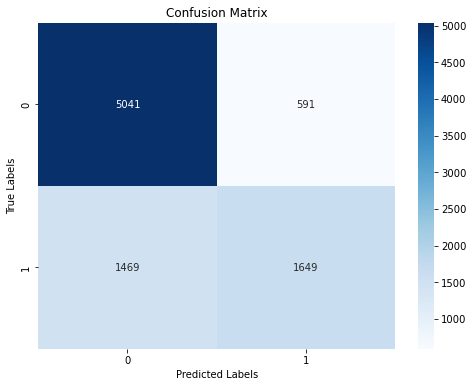

In [28]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(cm)

In [29]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred1 = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy)

0.7604571428571428


In [31]:
# for XGBoost
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)

[[4740  892]
 [1204 1914]]


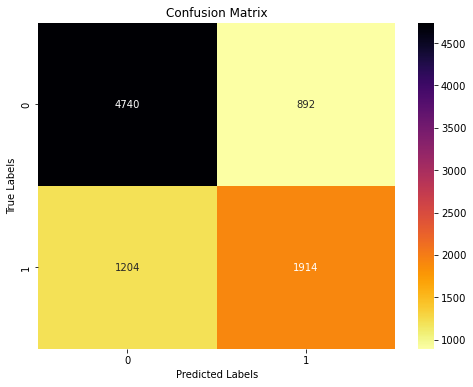

In [32]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="inferno_r")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(cm1)

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred3 = naive_bayes.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(accuracy3)

0.6021714285714286


In [35]:
# for Naive Bayes model
cm3 = confusion_matrix(y_test,y_pred3)
print(cm3)

[[2778 2854]
 [ 627 2491]]


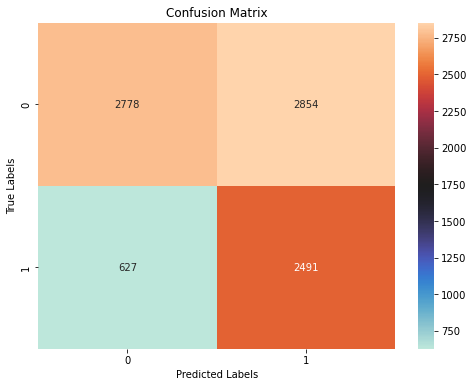

In [36]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="icefire")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(cm3)

In [37]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [38]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [39]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
     # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    return np.hstack((np.array(input_query).reshape(1,7),q1_bow,q2_bow))

In [40]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [41]:
rf.predict(query_point_creator(q1,q3))

array([0], dtype=int64)

In [42]:
cv

CountVectorizer(max_features=3000)

In [44]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))